# Rmixmodbasic example

## Data

Load the CSV data file as dataframe.

In [1]:
data <- read.table("mixmod-example.csv", sep = ";", header = TRUE)
head(data)

,Age,Wt,Pa,He,SBP,DBP,EKG,HG,SZ,SG,AP,BM
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,75,76,1,1,15,9,5,138,1.4142,8,1.0986,1
2,69,102,1,2,14,8,5,134,1.7321,9,1.0986,1
3,75,94,2,2,14,7,2,176,2.0000,8,2.1972,1
4,67,99,1,1,17,10,1,134,5.8310,8,1.6094,1
5,71,98,1,1,19,10,1,151,3.1623,11,1.7918,1
6,75,100,1,1,14,10,2,130,3.6056,9,2.0794,1


## Clustering with RMixtComp

Launch the RMixtComp package.

In [2]:
library(Rmixmod)

Loading required package: Rcpp

Rmixmod v. 2.1.5 / URI: www.mixmod.org



Define the ...

In [3]:
mixmodStrat <- mixmodStrategy(algo="EM",
                              epsilonInAlgo=0.001,
                              nbIterationInAlgo=200,
                              initMethod="smallEM",
                              nbTryInInit=10,
                              nbIterationInInit=5,
                              epsilonInInit=0.001)

Choose the desired number of classes and the number of runs for each given number of classes.

In [4]:
nbCluster <- 1:5

In [36]:
res <- mixmodCluster(data, criterion="ICL", strategy=mixmodStrat, nbCluster=nbCluster)

## Output's Analysis

### Criterion

This chart represents the criterion value for each model that was built. The lower the value (close to 0) the better the model.

### Variables

Draw the discriminating level of each variable. A high value (close to one) means that the variable is highly discriminating. A low value (close to zero) means that the variable is poorly discriminating. 

In [30]:
barplot(res)

ERROR: Error in barplotCluster(height@bestResult, height@data, ...): x must contain multinomial parameters. See hist() to plot Gaussian parameters.


Draw the distribution of the variables.

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


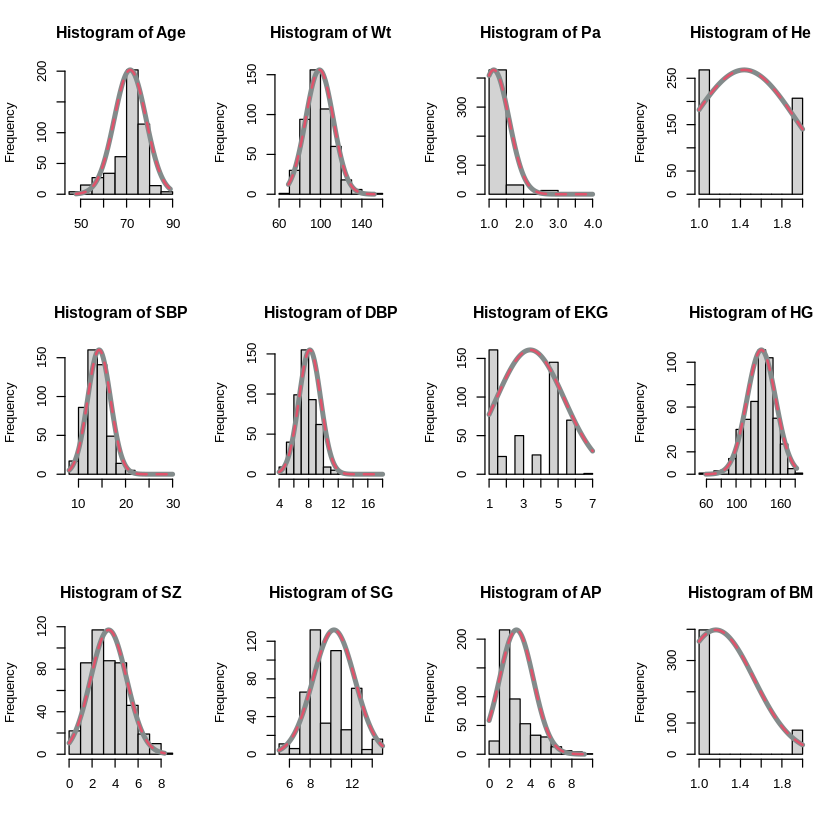

In [29]:
hist(res)

Draw the similarity between every pair of variable. A high value (close to one) means that the two variables provide the same information for the clustering task (i.e. similar partitions). A low value (close to zero) means that the two variables provide some different information for the clustering task (i.e. different partitions).

In [ ]:
heatmapVar(resK, pkg = "plotly")

Select a variable to draw its distribution.

In [ ]:
variable <- "SG"
plotDataBoxplot(resK, variable, grl = TRUE, pkg = "plotly")

### Classes

Draw the proportion of individuals in each class.

In [ ]:
plotProportion(resK, pkg = "plotly")

Draw the similarity level between each pair of classes. A high value (close to one) means that the 2 classes are strongly different (i.e. low overlapping). A low value (close to zero) means that the 2 classes are similar for the clustering task (i.e. high overlapping).

In [ ]:
heatmapClass(resK, pkg = "plotly")

Draw the discriminating level of each variable for the selected class.

In [ ]:
class <- 2
plotDiscrimVar(resK, class = class, pkg = "plotly")

Select a variable to draw its distribution for the selected class.

In [ ]:
variable <- "SG"
plotDataBoxplot(resK, variable, class = class, grl = TRUE, pkg = "plotly")

### Probabilities

Draw the probability of assignment to a class for each individual. Individuals have been reordered in decreasing assignment probability. 

In [ ]:
heatmapTikSorted(resK, pkg = "plotly")

### Advanced

Visualize in a *Gaussian-like way*, and onto R2, results of Gaussian or non-Gaussian based clustering.

In [ ]:
library(ClusVis)

In [ ]:
logTik <- getTik(resK, log = TRUE)
prop <- getProportion(resK)
resVisu <- clusvis(logTik, prop)

#### Component Interpretation

In [ ]:
plotDensityClusVisu(resVisu, add.obs = FALSE)

#### Observation Scatter-plot 

In [ ]:
plotDensityClusVisu(resVisu, add.obs = TRUE)